In [1]:
import pickle as pkl
import numpy as np
import torch
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [7]:
from utils import visualize

In [8]:
EPISODE = 999

In [9]:
test_dict = pkl.load(open(f'./history/episode_dict/episode_{1}_dict.pkl', 'rb'))

In [10]:
keys = list(test_dict.keys())
keys

['probs_1',
 'probs_2',
 'probs_3',
 'log_probs_1',
 'log_probs_2',
 'log_probs_3',
 'values',
 'rewards',
 'beta_1_list',
 'beta_2_list',
 'gamma_3_list',
 'train_loss',
 'valid_loss',
 'train_loss_dict',
 'valid_loss_dict']

In [11]:
test_dict['train_loss']

{'Adam': [1.9672595225274563,
  1.729220163077116,
  1.6321601830422878,
  1.5642641708254814,
  1.550673969089985,
  1.5333883799612522,
  1.5131569877266884,
  1.5113488659262657,
  1.507603745907545,
  1.502390269190073,
  1.5100666768848896,
  1.5082109421491623,
  1.5086594857275486,
  1.5005339942872524,
  1.4940867014229298,
  1.4991390183568,
  1.4982575960457325,
  1.4941815063357353,
  1.4896488934755325,
  1.4919860027730465,
  1.4869617968797684,
  1.4845197349786758,
  1.4864069297909737,
  1.4842934310436249,
  1.4856077544391155,
  1.4903479889035225,
  1.4770756661891937,
  1.484981968998909,
  1.4878503754734993,
  1.483917936682701,
  1.4898512475192547,
  1.4860007986426353,
  1.4869205057621002,
  1.4853467755019665,
  1.4874365851283073,
  1.4881091937422752,
  1.4937661290168762,
  1.481262695044279,
  1.4842945337295532,
  1.4821533001959324,
  1.483266118913889,
  1.4767540656030178,
  1.4771976619958878,
  1.47375463321805,
  1.4817201234400272,
  1.47874955832

In [33]:
prev_1st_train_loss = list()
prev_2nd_train_loss = list()
prev_3rd_train_loss = list()

prev_1st_valid_loss = list()
prev_2nd_valid_loss = list()
prev_3rd_valid_loss = list()

train_c = '#1f77b4'
valid_c = '#ff7f0e'

rewards_list = list()
score_list = list()

for episode in tqdm(range(1000), desc = f'Visualizing...'):
    test_dict = pkl.load(open(f'./history/episode_dict/episode_{episode}_dict.pkl', 'rb'))
    
    train_loss = test_dict['train_loss']['Ours']
    valid_loss = test_dict['valid_loss']['Ours']
    
    valid_loss = np.array(valid_loss)
    
    loss_score = valid_loss.sum()
    
    rewards_list.append(sum(test_dict['rewards']))
    
    score_list.append(loss_score)

Visualizing...:   0%|          | 0/1000 [00:00<?, ?it/s]

In [39]:
rewards_list = np.array(rewards_list)
score_list = np.array(score_list)

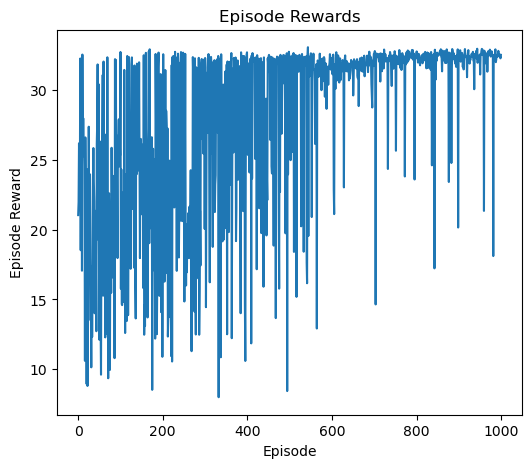

In [35]:
plt.figure(figsize = (6, 5))
plt.plot(rewards_list)
plt.title('Episode Rewards')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.show()

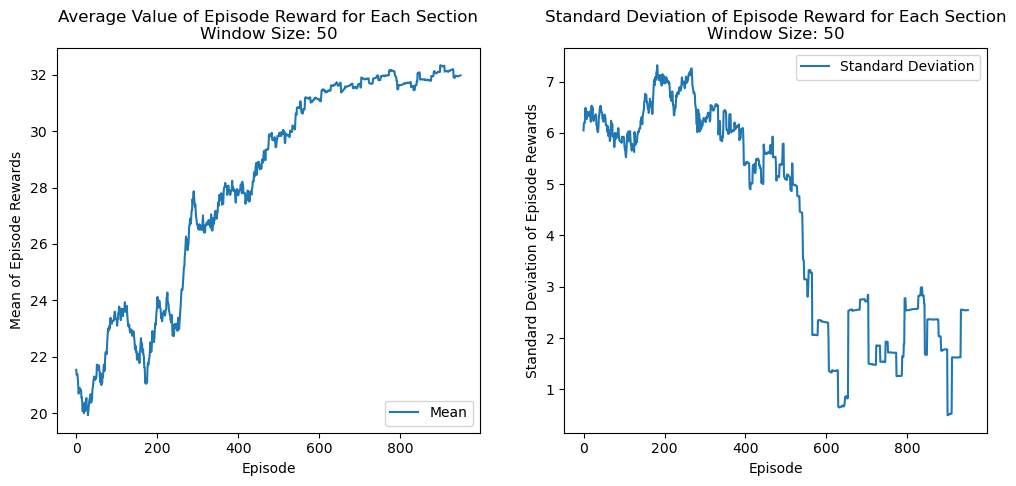

In [36]:
mwa = lambda x, window_size: [x[i : i + window_size].mean() for i in range(len(x) - window_size)]
mws = lambda x, window_size: [x[i : i + window_size].std() for i in range(len(x) - window_size)]

window_size = 50

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(mwa(rewards_list, window_size), label = 'Mean')
plt.title(f'Average Value of Episode Reward for Each Section\nWindow Size: {window_size}')
plt.legend(loc = 'lower right')
plt.xlabel('Episode')
plt.ylabel('Mean of Episode Rewards')
plt.subplot(1, 2, 2)
plt.plot(mws(rewards_list, window_size), label = 'Standard Deviation')
plt.title(f'Standard Deviation of Episode Reward for Each Section\nWindow Size: {window_size}')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Standard Deviation of Episode Rewards')
plt.show()

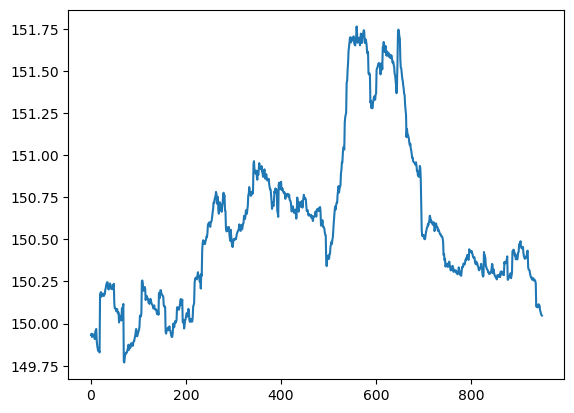

In [40]:
plt.plot(mwa(score_list, window_size = 50))
plt.title('Summation of Loss for each Episode')
plt.show()

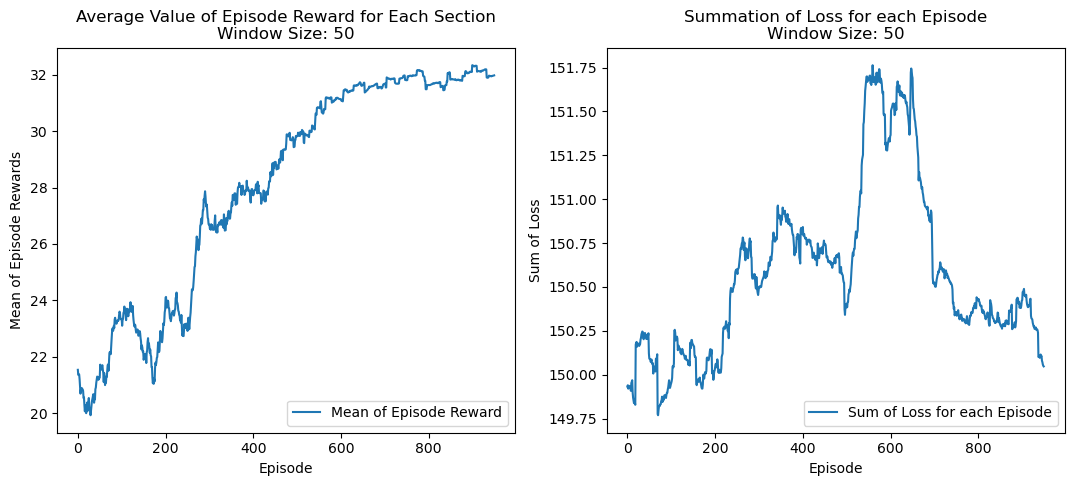

In [69]:
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
plt.plot(mwa(rewards_list, window_size), label = 'Mean of Episode Reward')
plt.title(f'Average Value of Episode Reward for Each Section\nWindow Size: {window_size}')
plt.legend(loc = 'lower right')
plt.xlabel('Episode')
plt.ylabel('Mean of Episode Rewards')
plt.subplot(1, 2, 2)
plt.plot(mwa(score_list, window_size), label = 'Sum of Loss for each Episode')
plt.title(f'Summation of Loss for each Episode\nWindow Size: {window_size}')
plt.legend(loc = 'lower right')
plt.xlabel('Episode')
plt.ylabel('Sum of Loss')
plt.show()

In [91]:
train_loss_list_pt1 = list()
valid_loss_list_pt1 = list()

train_loss_list_pt2 = list()
valid_loss_list_pt2 = list()

for episode in tqdm(range(0, 250), desc = f'Visualizing...'):
    test_dict = pkl.load(open(f'./history/episode_dict/episode_{episode}_dict.pkl', 'rb'))
    
    train_loss = test_dict['train_loss']['Ours']
    valid_loss = test_dict['valid_loss']['Ours']
    
    train_loss_list_pt1.append(train_loss)
    valid_loss_list_pt1.append(valid_loss)
    
for episode in tqdm(range(750, 1000), desc = f'Visualizing...'):
    test_dict = pkl.load(open(f'./history/episode_dict/episode_{episode}_dict.pkl', 'rb'))
    
    train_loss = test_dict['train_loss']['Ours']
    valid_loss = test_dict['valid_loss']['Ours']
    
    train_loss_list_pt2.append(train_loss)
    valid_loss_list_pt2.append(valid_loss)

train_loss_list_pt1 = np.array(train_loss_list_pt1)
valid_loss_list_pt1 = np.array(valid_loss_list_pt1)

train_loss_list_pt2 = np.array(train_loss_list_pt2)
valid_loss_list_pt2 = np.array(valid_loss_list_pt2)

Visualizing...:   0%|          | 0/250 [00:00<?, ?it/s]

Visualizing...:   0%|          | 0/250 [00:00<?, ?it/s]

In [92]:
avg_train_loss_pt1 = train_loss_list_pt1.mean(axis = 0)
avg_valid_loss_pt1 = valid_loss_list_pt1.mean(axis = 0)

avg_train_loss_pt2 = train_loss_list_pt2.mean(axis = 0)
avg_valid_loss_pt2 = valid_loss_list_pt2.mean(axis = 0)

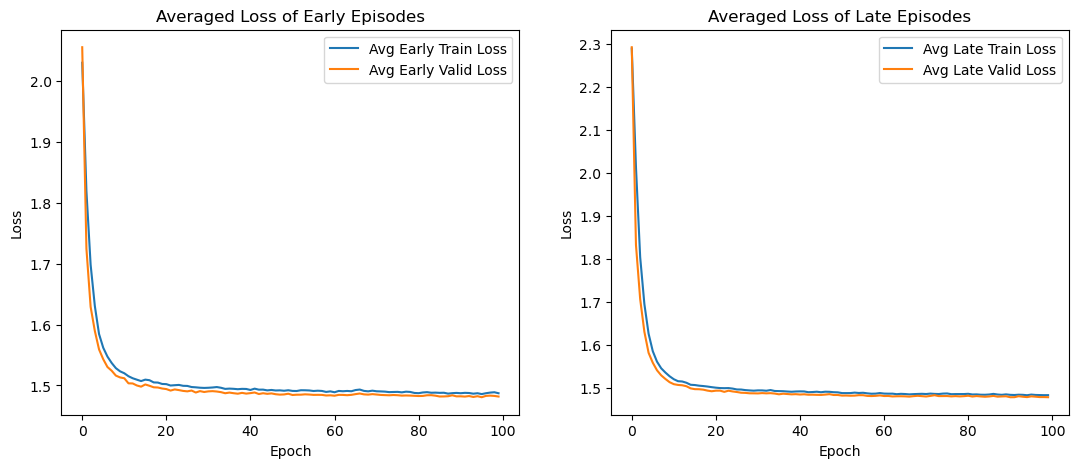

In [93]:
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
plt.plot(avg_train_loss_pt1, label = 'Avg Early Train Loss')
plt.plot(avg_valid_loss_pt1, label = 'Avg Early Valid Loss')
plt.title(f'Averaged Loss of Early Episodes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(avg_train_loss_pt2, label = 'Avg Late Train Loss')
plt.plot(avg_valid_loss_pt2, label = 'Avg Late Valid Loss')
plt.title(f'Averaged Loss of Late Episodes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

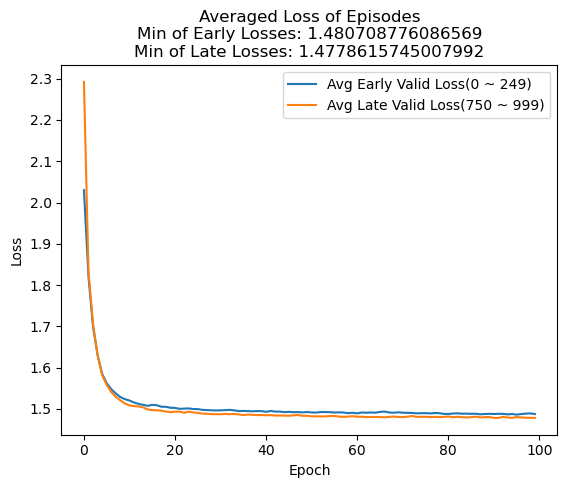

In [98]:
plt.plot(avg_train_loss_pt1, label = 'Avg Early Valid Loss(0 ~ 249)')
plt.plot(avg_valid_loss_pt2, label = 'Avg Late Valid Loss(750 ~ 999)')
plt.title(f'Averaged Loss of Episodes\nMin of Early Losses: {avg_valid_loss_pt1.min()}\nMin of Late Losses: {avg_valid_loss_pt2.min()}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [99]:
test_list = np.array([1, 2, 3, 4])
t1 = test_list[1:]
t2 = test_list[:-1]
t1 - t2, t1, t2

(array([1, 1, 1]), array([2, 3, 4]), array([1, 2, 3]))

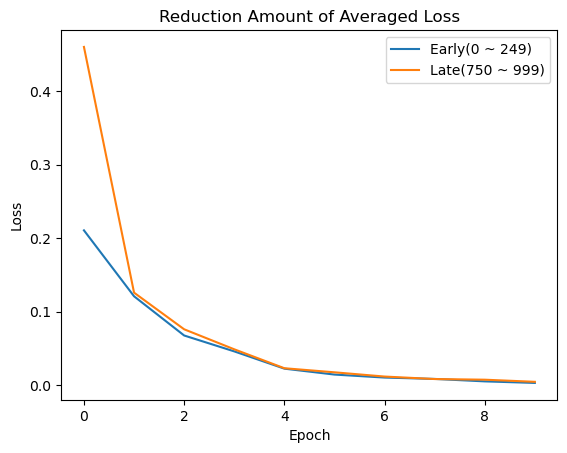

In [100]:
plt.plot(avg_train_loss_pt1[:-1][:10] - avg_train_loss_pt1[1:][:10], label = 'Early(0 ~ 249)')
plt.plot(avg_valid_loss_pt2[:-1][:10] - avg_valid_loss_pt2[1:][:10], label = 'Late(750 ~ 999)')
plt.title(f'Reduction Amount of Averaged Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [103]:
train_loss_list = list()
valid_loss_list = list()

for episode in tqdm(range(0, 1000), desc = f'Visualizing...'):
    test_dict = pkl.load(open(f'./history/episode_dict/episode_{episode}_dict.pkl', 'rb'))
    
    train_loss = test_dict['train_loss']['Ours']
    valid_loss = test_dict['valid_loss']['Ours']
    
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    
train_loss_list = np.array(train_loss_list)
valid_loss_list = np.array(valid_loss_list)

Visualizing...:   0%|          | 0/1000 [00:00<?, ?it/s]

In [107]:
avg_train_loss_1st = train_loss_list[:251].mean(axis = 0)
avg_train_loss_2nd = train_loss_list[250:501].mean(axis = 0)
avg_train_loss_3rd = train_loss_list[500:751].mean(axis = 0)
avg_train_loss_4th = train_loss_list[750:1000].mean(axis = 0)

avg_valid_loss_1st = valid_loss_list[:251].mean(axis = 0)
avg_valid_loss_2nd = valid_loss_list[250:501].mean(axis = 0)
avg_valid_loss_3rd = valid_loss_list[500:751].mean(axis = 0)
avg_valid_loss_4th = valid_loss_list[750:1000].mean(axis = 0)

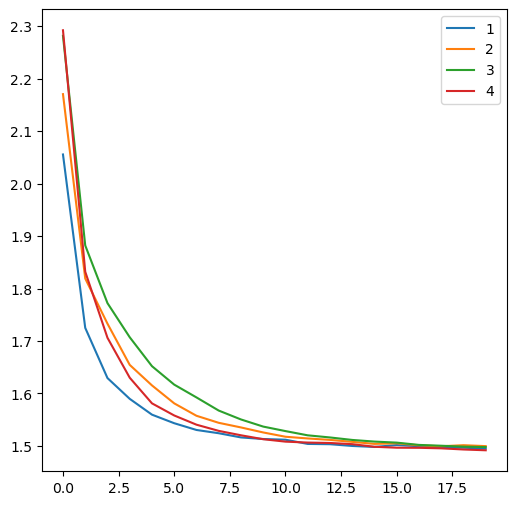

In [109]:
plt.figure(figsize = (6, 6))
plt.plot(avg_valid_loss_1st[:20], label = '1')
plt.plot(avg_valid_loss_2nd[:20], label = '2')
plt.plot(avg_valid_loss_3rd[:20], label = '3')
plt.plot(avg_valid_loss_4th[:20], label = '4')
plt.legend()
plt.show()